# IMPORTING LIBRARIES

In [1]:
import requests
from bs4 import BeautifulSoup
search = str(input())
d={'q': search}
results = requests.get('https://scholar.google.com/scholar', params=d)
paper_url=results.url
print(paper_url)

literacy rate
https://scholar.google.com/scholar?q=literacy+rate


In [2]:
# this function for the getting inforamtion of the web page
def get_paperinfo(paper_url):
      headers = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.114 Safari/537.36'}

  #download the page
      response=requests.get(paper_url,headers=headers)

  # check successful response
      if response.status_code != 200:
        print('Status code:', response.status_code)
        raise Exception('Failed to fetch web page ')

  #parse using beautiful soup
      paper_doc = BeautifulSoup(response.text,'html.parser')

      return paper_doc
paper_doc=get_paperinfo(paper_url)
paper_doc

<!DOCTYPE doctype html>
<html><head><title>Google Scholar</title><meta content="text/html;charset=utf-8" http-equiv="Content-Type"/><meta content="IE=Edge" http-equiv="X-UA-Compatible"/><meta content="origin-when-cross-origin" name="referrer"/><meta content="width=device-width,initial-scale=1,minimum-scale=1,maximum-scale=2" name="viewport"/><meta content="telephone=no" name="format-detection"/><link href="/favicon.ico" rel="shortcut icon"/><style>html,body,form,table,div,h1,h2,h3,h4,h5,h6,img,ol,ul,li,button{margin:0;padding:0;border:0;}table{border-collapse:collapse;border-width:0;empty-cells:show;}html,body{height:100%}#gs_top{position:relative;box-sizing:border-box;min-height:100%;min-width:964px;-webkit-tap-highlight-color:rgba(0,0,0,0);}#gs_top>*:not(#x){-webkit-tap-highlight-color:rgba(204,204,204,.5);}.gs_el_ph #gs_top,.gs_el_ta #gs_top{min-width:320px;}#gs_top.gs_nscl{position:fixed;width:100%;}body,td,input,button{font-size:13px;font-family:Arial,sans-serif;line-height:1.24;}

In [3]:
# this function for the extracting information of the tags
def get_tags(doc):
    paper_tag = doc.select('[data-lid]')
    cite_tag = doc.find_all(["a","div"], {"class": "gs_fl"})
    link_tag = doc.find_all('h3',{"class" : "gs_rt"})
    author_tag = doc.find_all("div", {"class": "gs_a"})

    return paper_tag,cite_tag,link_tag,author_tag
paper_tag,cite_tag,link_tag,author_tag=get_tags(paper_doc)
paper_tag,cite_tag,link_tag,author_tag

([<div class="gs_r gs_or gs_scl" data-aid="t8DgRrVSWuYJ" data-cid="t8DgRrVSWuYJ" data-did="t8DgRrVSWuYJ" data-lid="" data-rp="0"><div class="gs_ggs gs_fl"><div class="gs_ggsd"><div class="gs_or_ggsm" ontouchstart="gs_evt_dsp(event)" tabindex="-1"><a data-clk="hl=en&amp;sa=T&amp;oi=gga&amp;ct=gga&amp;cd=0&amp;d=16598670315159077047&amp;ei=x_g_Y9GXEon8mgGB8Z2ADw" data-clk-atid="t8DgRrVSWuYJ" href="https://ourworldindata.org/literacy?fbclid=IwAR06_PeRfWHkM0PcZopFd62LfbQj9COjAz-xqtF7ShAy-U8Jzfkjy85dSIM"><span class="gs_ctg2">[HTML]</span> ourworldindata.org</a></div></div></div><div class="gs_ri"><h3 class="gs_rt" ontouchstart="gs_evt_dsp(event)"><span class="gs_ctc"><span class="gs_ct1">[HTML]</span><span class="gs_ct2">[HTML]</span></span> <a data-clk="hl=en&amp;sa=T&amp;oi=ggp&amp;ct=res&amp;cd=0&amp;d=16598670315159077047&amp;ei=x_g_Y9GXEon8mgGB8Z2ADw" data-clk-atid="t8DgRrVSWuYJ" href="https://ourworldindata.org/literacy?fbclid=IwAR06_PeRfWHkM0PcZopFd62LfbQj9COjAz-xqtF7ShAy-U8Jzfkjy85

In [4]:
# it will return the title of the paper
def get_papertitle(paper_tag):
    paper_names = []
  
    for tag in paper_tag:
        paper_names.append(tag.select('h3')[0].get_text())

    return paper_names
paper_names=get_papertitle(paper_tag)
paper_names

['[HTML][HTML] Literacy',
 '[PDF][PDF] Literacy rate in India',
 '[HTML][HTML] The province-wise literacy rate in Pakistan and its impact on the economy',
 '[PDF][PDF] Defining literacy',
 '[HTML][HTML] Female literacy rate is a better predictor of birth rate and infant mortality rate in India',
 '[PDF][PDF] Relationship among GDP, per capita GDP, literacy rate and unemployment rate',
 '[PDF][PDF] Statistical trends in literacy rate in Nepal',
 'Benchmarking the effective literacy rate',
 'Tax literacy rate among taxpayers: Evidence from Malaysia',
 'Understanding the reading habit and attitudes among the rural community in low literacy rate areas in Malaysia: Rural library perspectives']

In [5]:
# it will return the number of citation of the paper
def get_citecount(cite_tag):
    import regex as re
    cite_count = []
    for i in cite_tag:
        cite=i.text
        if i is None or cite is None :
            cite_count.append(0)
        else:
            temp=re.search(r'\d+',cite)
            if temp is None:
                cite_count.append(0)
            else:
                cite_count.append(int(temp.group()))
        #one needs to remove all the zeroes from the list as they are just extra data points resulting from improper reading of text
        for j in range(len(cite_count)):
            if cite_count[j]==0:
                del cite_count[j]
            else: 
                pass
    return cite_count
cite=get_citecount(cite_tag)
cite

[198, 18, 116, 71, 32, 19, 17, 12, 40, 15]

In [6]:
# function for the getting link information
def get_link(link_tag):
    links = []
    for i in range(len(link_tag)) :
        links.append(link_tag[i].a['href']) 

    return links 
link=get_link(link_tag)
link

['https://ourworldindata.org/literacy?fbclid=IwAR06_PeRfWHkM0PcZopFd62LfbQj9COjAz-xqtF7ShAy-U8Jzfkjy85dSIM',
 'https://www.raijmr.com/ijrsml/wp-content/uploads/2017/11/IJRSML_2013_vol01_issue_07_04.pdf',
 'https://www.sciencedirect.com/science/article/pii/S2405883116300247',
 'https://gaml.uis.unesco.org/wp-content/uploads/sites/2/2018/12/4.6.1_07_4.6-defining-literacy.pdf',
 'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4649870/',
 'https://www.researchgate.net/profile/M-S-Rahman/publication/283355268_Relationship_among_GDP_Per_Capita_GDP_Literacy_Rate_and_Unemployment_Rate/links/583440a508aef19cb81f5749/Relationship-among-GDP-Per-Capita-GDP-Literacy-Rate-and-Unemployment-Rate.pdf',
 'https://www.researchgate.net/profile/Basanta-Dhakal/publication/335107114_Statistical_Trends_in_Literacy_Rates_in_Nepal/links/5d50465f4585153e594e9865/Statistical-Trends-in-Literacy-Rates-in-Nepal.pdf',
 'https://www.sciencedirect.com/science/article/pii/S0165489608000334',
 'https://journal.uii.ac.id/JA

In [7]:
# function for the getting autho , year and publication information
import regex as re
def get_author_year_publi_info(authors_tag):
    years = []
    publication = []
    authors = []
    for i in range(len(authors_tag)):
        authortag_text = (authors_tag[i].text).split()
        year = int(re.search(r'\d+', authors_tag[i].text).group())
        years.append(year)
        publication.append(authortag_text[-1])
        author = authortag_text[0] + ' ' + re.sub(',','', authortag_text[1])
        authors.append(author)
  
    return years , publication, authors
year,publication,author=get_author_year_publi_info(author_tag)
year,publication,author

([2016, 2013, 2015, 2018, 2013, 2013, 2018, 2008, 2005, 2019],
 ['ourworldindata.org',
  'raijmr.com',
  'Elsevier',
  'gaml.uis.unesco.org',
  'ncbi.nlm.nih.gov',
  'researchgate.net',
  'researchgate.net',
  'Elsevier',
  'journal.uii.ac.id',
  'emerald.com'],
 ['M Roser',
  'N Shah',
  'A Rehman',
  'S Montoya',
  'S Saurabh',
  'MS Rahman',
  'B Dhakal',
  'T Lee',
  'ARA Latiff',
  'SF Samsuddin'])

In [8]:
# creating final repository
import pandas as pd
paper_repos_dict = {
                    'Paper Title' : [],
                    'Year' : [],
                    'Author' : [],
                    'Citation' : [],
                    'Publication' : [],
                    'Url of paper' : [] }

# adding information in repository
def add_in_paper_repo(papername,year,author,cite,publi,link):
    paper_repos_dict['Paper Title'].extend(papername)
    paper_repos_dict['Year'].extend(year)
    paper_repos_dict['Author'].extend(author)
    paper_repos_dict['Citation'].extend(cite)
    paper_repos_dict['Publication'].extend(publi)
    paper_repos_dict['Url of paper'].extend(link)

    return pd.DataFrame(paper_repos_dict)
sample_df=add_in_paper_repo(paper_names,year,author,cite,publication,link)
sample_df

,Paper Title,Year,Author,Citation,Publication,Url of paper
0,[HTML][HTML] Literacy,2016,M Roser,198,ourworldindata.org,https://ourworldindata.org/literacy?fbclid=IwA...
1,[PDF][PDF] Literacy rate in India,2013,N Shah,18,raijmr.com,https://www.raijmr.com/ijrsml/wp-content/uploa...
2,[HTML][HTML] The province-wise literacy rate i...,2015,A Rehman,116,Elsevier,https://www.sciencedirect.com/science/article/...
3,[PDF][PDF] Defining literacy,2018,S Montoya,71,gaml.uis.unesco.org,https://gaml.uis.unesco.org/wp-content/uploads...
4,[HTML][HTML] Female literacy rate is a better ...,2013,S Saurabh,32,ncbi.nlm.nih.gov,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...
5,"[PDF][PDF] Relationship among GDP, per capita ...",2013,MS Rahman,19,researchgate.net,https://www.researchgate.net/profile/M-S-Rahma...
6,[PDF][PDF] Statistical trends in literacy rate...,2018,B Dhakal,17,researchgate.net,https://www.researchgate.net/profile/Basanta-D...
7,Benchmarking the effective literacy rate,2008,T Lee,12,Elsevier,https://www.sciencedirect.com/science/article/...
8,Tax literacy rate among taxpayers: Evidence fr...,2005,ARA Latiff,40,journal.uii.ac.id,https://journal.uii.ac.id/JAAI/article/view/809
9,Understanding the reading habit and attitudes ...,2019,SF Samsuddin,15,emerald.com,https://www.emerald.com/insight/content/doi/10...


In [10]:
#Scrapping multiple pages
import time
for i in range (1,110,10):

  # get url for the each page
      url = paper_url.format(i)

  # function for the get content of each page
      doc = get_paperinfo(url)

  # function for the collecting tags
      paper_tag,cite_tag,link_tag,author_tag = get_tags(doc)
  
  # paper title from each page
      papername = get_papertitle(paper_tag)

  # year , author , publication of the paper
      year , publication , author = get_author_year_publi_info(author_tag)

  # cite count of the paper 
      cite = get_citecount(cite_tag)

  # url of the paper
      link = get_link(link_tag)

  # add in paper repo dict
      final = add_in_paper_repo(papername,year,author,cite,publication,link)
  
  # use sleep to avoid status code 429
      time.sleep(10)

In [11]:
final.to_csv('literacy-rate.csv', sep=',', index=False,header=True)

# EXPLORATORY DATA ANALYSIS

In [12]:
#importing libraries 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [44]:
df=pd.read_csv("literacy-rate.csv")
df.head(20)

,Paper Title,Year,Author,Citation,Publication,Url of paper
0,[HTML][HTML] Literacy,2016,M Roser,198,ourworldindata.org,https://ourworldindata.org/literacy?fbclid=IwA...
1,[PDF][PDF] Literacy rate in India,2013,N Shah,18,raijmr.com,https://www.raijmr.com/ijrsml/wp-content/uploa...
2,[HTML][HTML] The province-wise literacy rate i...,2015,A Rehman,116,Elsevier,https://www.sciencedirect.com/science/article/...
3,[PDF][PDF] Defining literacy,2018,S Montoya,71,gaml.uis.unesco.org,https://gaml.uis.unesco.org/wp-content/uploads...
4,[HTML][HTML] Female literacy rate is a better ...,2013,S Saurabh,32,ncbi.nlm.nih.gov,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...
5,"[PDF][PDF] Relationship among GDP, per capita ...",2013,MS Rahman,19,researchgate.net,https://www.researchgate.net/profile/M-S-Rahma...
6,[PDF][PDF] Statistical trends in literacy rate...,2018,B Dhakal,17,researchgate.net,https://www.researchgate.net/profile/Basanta-D...
7,Benchmarking the effective literacy rate,2008,T Lee,12,Elsevier,https://www.sciencedirect.com/science/article/...
8,Tax literacy rate among taxpayers: Evidence fr...,2005,ARA Latiff,40,journal.uii.ac.id,https://journal.uii.ac.id/JAAI/article/view/809
9,Understanding the reading habit and attitudes ...,2019,SF Samsuddin,15,emerald.com,https://www.emerald.com/insight/content/doi/10...


### Here we are getting duplicate rows. we have to remove the duplicate values and produce a new csv file.

In [45]:
file_df = pd.read_csv("literacy-rate.csv")

# Keep only FIRST record from set of duplicates
file_df_first_record = file_df.drop_duplicates(subset=["Paper Title", "Year", "Author", "Citation", "Publication", "Url of paper"], keep="first")
file_df_first_record.to_excel("Duplicates_First_Record.xlsx", index=False)

# Keep only LAST record from set of duplicates
file_df_last_record = file_df.drop_duplicates(subset=["Paper Title", "Year", "Author", "Citation", "Publication", "Url of paper"], keep="last")
file_df_last_record.to_excel("Duplicates_Last_Record.xlsx", index=False)

# Remove ALL records of a set of duplicates
file_df_remove_all = file_df.drop_duplicates(subset=["Paper Title", "Year", "Author", "Citation", "Publication", "Url of paper"], keep=False)
file_df_remove_all.to_excel("Duplicates_All_Removed.xlsx", index=False)

In [46]:
df2=pd.read_excel("Duplicates_First_Record.xlsx")
df2.head(20)

,Paper Title,Year,Author,Citation,Publication,Url of paper
0,[HTML][HTML] Literacy,2016,M Roser,198,ourworldindata.org,https://ourworldindata.org/literacy?fbclid=IwA...
1,[PDF][PDF] Literacy rate in India,2013,N Shah,18,raijmr.com,https://www.raijmr.com/ijrsml/wp-content/uploa...
2,[HTML][HTML] The province-wise literacy rate i...,2015,A Rehman,116,Elsevier,https://www.sciencedirect.com/science/article/...
3,[PDF][PDF] Defining literacy,2018,S Montoya,71,gaml.uis.unesco.org,https://gaml.uis.unesco.org/wp-content/uploads...
4,[HTML][HTML] Female literacy rate is a better ...,2013,S Saurabh,32,ncbi.nlm.nih.gov,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...
5,"[PDF][PDF] Relationship among GDP, per capita ...",2013,MS Rahman,19,researchgate.net,https://www.researchgate.net/profile/M-S-Rahma...
6,[PDF][PDF] Statistical trends in literacy rate...,2018,B Dhakal,17,researchgate.net,https://www.researchgate.net/profile/Basanta-D...
7,Benchmarking the effective literacy rate,2008,T Lee,12,Elsevier,https://www.sciencedirect.com/science/article/...
8,Tax literacy rate among taxpayers: Evidence fr...,2005,ARA Latiff,40,journal.uii.ac.id,https://journal.uii.ac.id/JAAI/article/view/809
9,Understanding the reading habit and attitudes ...,2019,SF Samsuddin,15,emerald.com,https://www.emerald.com/insight/content/doi/10...


In [47]:
null_rows = df.isnull().any(axis=1)
null_rows

0      False
1      False
2      False
3      False
4      False
       ...  
185    False
186    False
187    False
188    False
189    False
Length: 190, dtype: bool

It is evident that no row has null value hence we can proceed with the data visualization


In [48]:
df.describe()#to show descriptive analysis of the data

,Year,Citation
count,190.000000,190.00000
mean,2013.800000,53.80000
std,4.272714,57.35568
min,2005.000000,12.00000
25%,2013.000000,17.00000
50%,2014.000000,25.50000
75%,2018.000000,71.00000
max,2019.000000,198.00000


The data has only citation as numeric data type rest are categorical 

In [49]:
#getting the value count of categorical variables 
df["Author"].value_counts(),df["Publication"].value_counts()

(M Roser         19
 N Shah          19
 A Rehman        19
 S Montoya       19
 S Saurabh       19
 MS Rahman       19
 B Dhakal        19
 T Lee           19
 ARA Latiff      19
 SF Samsuddin    19
 Name: Author, dtype: int64, Elsevier               38
 researchgate.net       38
 ourworldindata.org     19
 raijmr.com             19
 gaml.uis.unesco.org    19
 ncbi.nlm.nih.gov       19
 journal.uii.ac.id      19
 emerald.com            19
 Name: Publication, dtype: int64)

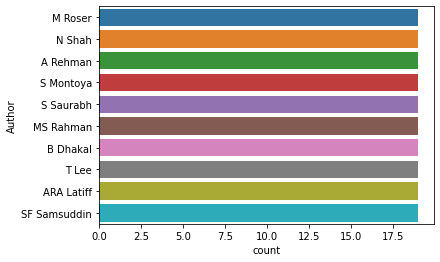

In [50]:
#visualizing the value count 
import seaborn as sn 
sn.countplot(data=df,y="Author")

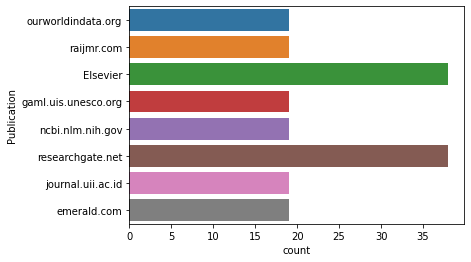

In [51]:
sn.countplot(data=df,y="Publication")

### The Elsevier and Research Gate publication has the highest number of publications. Thus, we can make an inference that these two publications(and their team) are more about this field. In my point of view unesco should consider more about literacy rate as their papers are not enough in numbers. They are doing not enough work in this field.

In [52]:
df["Year"].value_counts()

2013    57
2018    38
2016    19
2015    19
2008    19
2005    19
2019    19
Name: Year, dtype: int64

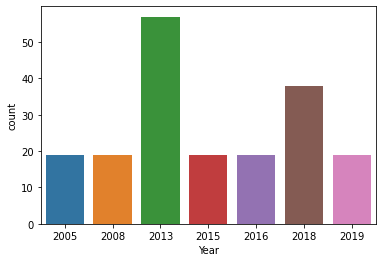

In [53]:
sn.countplot(data=df,x="Year")

### It is evident from the above graph that the number of citations across year 2013 and 2018 is the highest hence we can make a point that those were the years in which there would be a significant change in this field.